In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [56]:
df = pd.read_csv('/content/admission_data.csv')

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.count()

GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

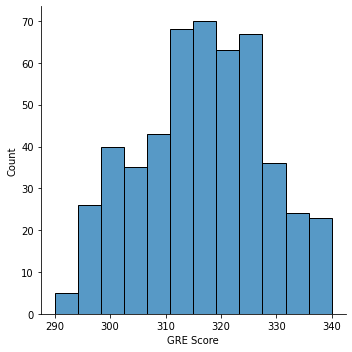

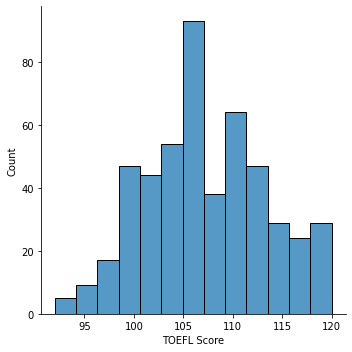

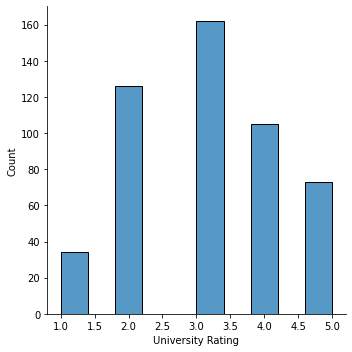

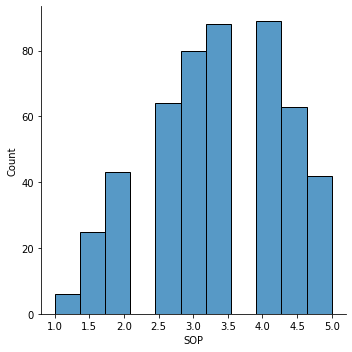

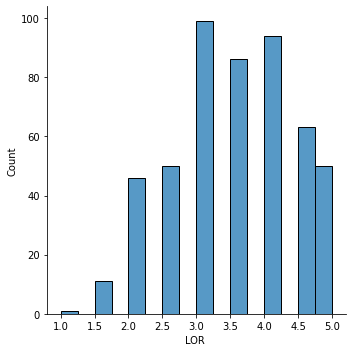

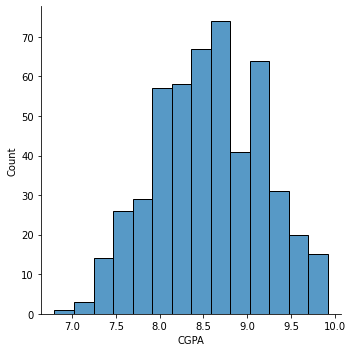

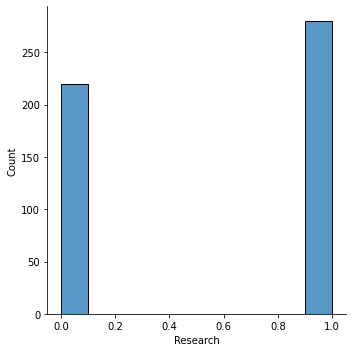

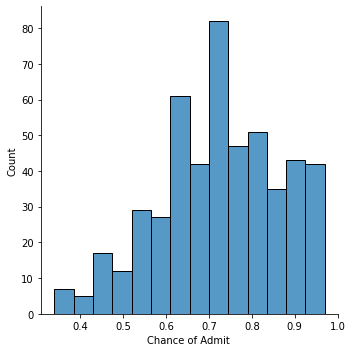

In [8]:
for i in df.columns:
    sns.displot(df[i])
    plt.show()

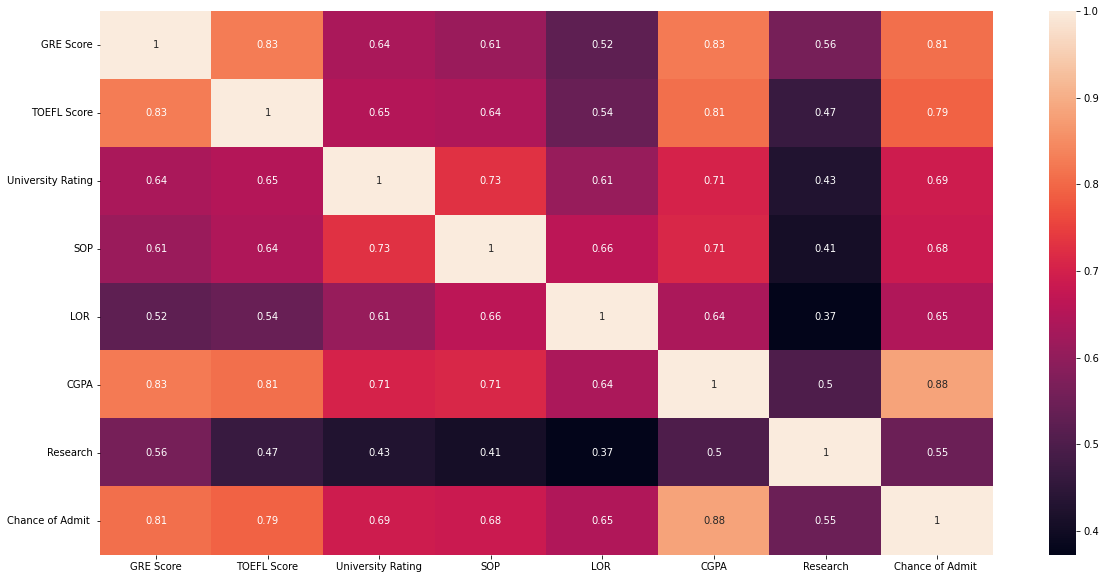

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [22]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
x = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [62]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [63]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [100]:
model = keras.Sequential()
model.add(layers.Dense(7,activation='relu'))
model.add(layers.Dense(2,activation='relu'))
model.add(layers.Dense(1))

In [108]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])
hist = model.fit(x,y,validation_split=0.2,batch_size=32,epochs=150)

Epoch 1/150
13/13 [==============================] - 1s 31ms/step - loss: 1.2780 - mean_squared_error: 1.2780 - val_loss: 0.8550 - val_mean_squared_error: 0.8550
Epoch 2/150
13/13 [==============================] - 0s 8ms/step - loss: 0.7374 - mean_squared_error: 0.7374 - val_loss: 0.9835 - val_mean_squared_error: 0.9835
Epoch 3/150
13/13 [==============================] - 0s 15ms/step - loss: 0.6517 - mean_squared_error: 0.6517 - val_loss: 0.8298 - val_mean_squared_error: 0.8298
Epoch 4/150
13/13 [==============================] - 0s 18ms/step - loss: 0.6600 - mean_squared_error: 0.6600 - val_loss: 0.9027 - val_mean_squared_error: 0.9027
Epoch 5/150
13/13 [==============================] - 0s 17ms/step - loss: 0.6790 - mean_squared_error: 0.6790 - val_loss: 0.8837 - val_mean_squared_error: 0.8837
Epoch 6/150
13/13 [==============================] - 0s 16ms/step - loss: 0.6433 - mean_squared_error: 0.6433 - val_loss: 0.7676 - val_mean_squared_error: 0.7676
Epoch 7/150
13/13 [==========

In [102]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 7)                 56        
                                                                 
 dense_23 (Dense)            (None, 2)                 16        
                                                                 
 dense_24 (Dense)            (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


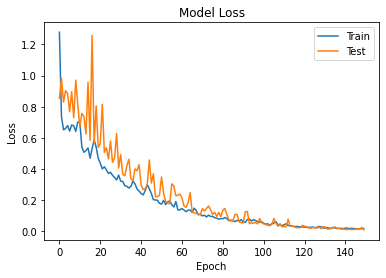

In [109]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc='upper right')
plt.show()

In [127]:
x_pred = np.array([[340,120,5,5,5,10,0]])
x_pred = np.array(x_pred,dtype=np.float64)
y_pred = model.predict(x_pred)
print('x = ', x_pred[0], '\nChance of Admit = ', y_pred[0][0]*100,'%')

x =  [340. 120.   5.   5.   5.  10.   0.] 
Chance of Admit =  98.07113409042358 %
